# Case Description - Titanic

*This case study is from Kaggle website to Predict survival on the Titanic and get familiar with Machine Learning (ML) basics.*

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this case study, we will analyze what sorts of people were likely to survive. To do so, we will apply some tools of machine learning to predict which passengers survived the tragedy.



In [1]:
# Let import some important packages
import pandas as pd # the name is derived from the term "panel data", it's a software library for data manipulation and analysis
import numpy as np # creating and manipulating numerical data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # library based on matplotlib, high-level interface for drawing attractive statistical graphics
sns.set()
% matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (12,8)
%config InlineBackend.figure_format = 'retina'

#### Display Website

In [12]:
from IPython.display import IFrame
IFrame("https://www.torontorentals.com/toronto", width = 800, height = 350)

In [20]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information
%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

UsageError: Line magic function `%install_ext` not found.


In [17]:
import qgrid
qgrid.nbinstall(overwrite = True)
#qgrid.show_grid(df[['col1', 'col2', 'col3']], remote.js = True)

AttributeError: module 'qgrid' has no attribute 'nbinstall'

# Loading the data 

Data has been split in 2 for training purpose

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Let explore the data

In [3]:
# How do our data first rows look like?
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# What is the difference between train & test data? take a look.
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# let get some statistical insights through the numerical data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Missing values

In [9]:
train['Age'] = train.Age.fillna(train.Age.median())
test['Age'] = test.Age.fillna(train.Age.median())
test['Fare'] = test.Fare.fillna(test.Fare.median())
train['Embarked'] = train.Embarked.fillna('S')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [14]:
test['Sex'] = test['Sex'].map({'male':0, 'female':1})
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [15]:
# Sex & Embarked type changed to float
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


# Defining data to use

In [17]:
df_train = train.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis = 1)
df_test = test.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis = 1)

In [18]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Family relations

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [19]:
df_train['FamSize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamSize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
FamSize     891 non-null int64
dtypes: float64(2), int64(7)
memory usage: 62.7 KB


# Visualizing Data

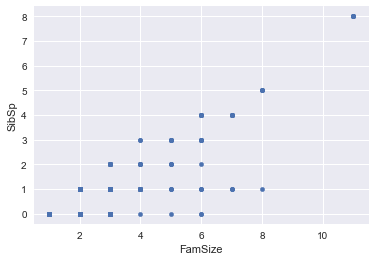

In [21]:
df_train.plot.scatter(x ='FamSize', y='SibSp')

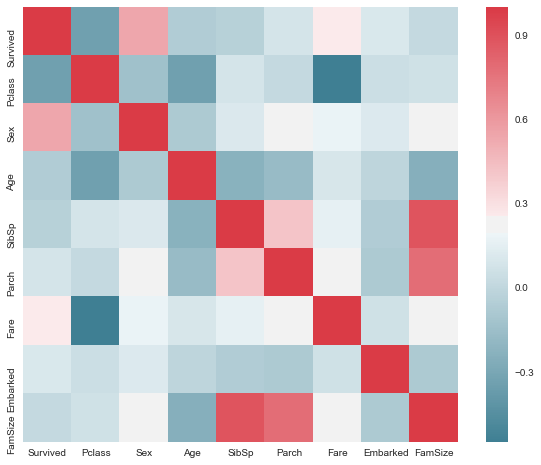

In [22]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [23]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize
Survived,1,-0.34,0.54,-0.065,-0.035,0.082,0.26,0.11,0.017
Pclass,-0.34,1,-0.13,-0.34,0.083,0.018,-0.55,0.046,0.066
Sex,0.54,-0.13,1,-0.081,0.11,0.25,0.18,0.12,0.2
Age,-0.065,-0.34,-0.081,1,-0.23,-0.17,0.097,-0.0092,-0.25
SibSp,-0.035,0.083,0.11,-0.23,1,0.41,0.16,-0.06,0.89
Parch,0.082,0.018,0.25,-0.17,0.41,1,0.22,-0.079,0.78
Fare,0.26,-0.55,0.18,0.097,0.16,0.22,1,0.062,0.22
Embarked,0.11,0.046,0.12,-0.0092,-0.06,-0.079,0.062,1,-0.08
FamSize,0.017,0.066,0.2,-0.25,0.89,0.78,0.22,-0.08,1


In [24]:
df_train = df_train.drop(['SibSp', 'Parch'], axis=1)
df_test = df_test.drop(['SibSp', 'Parch'], axis=1)

In [25]:
df_test.describe()

,Pclass,Sex,Age,Fare,Embarked,FamSize
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,29.805024,35.576535,0.464115,1.839713
std,0.841838,0.481622,12.667969,55.850103,0.685516,1.519072
min,1.000000,0.000000,0.170000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,23.000000,7.895800,0.000000,1.000000
50%,3.000000,0.000000,28.000000,14.454200,0.000000,1.000000
75%,3.000000,1.000000,35.750000,31.471875,1.000000,2.000000
max,3.000000,1.000000,76.000000,512.329200,2.000000,11.000000


In [26]:
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')

In [27]:
scaler = preprocessing.RobustScaler()
scaled_df = scaler.fit_transform(df_train)
scaled_df = pd.DataFrame(scaled_df, columns=['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamSize'])

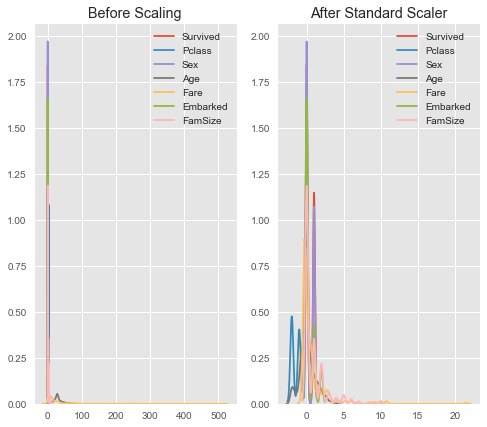

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 7))

ax1.set_title('Before Scaling')
sns.kdeplot(df_train['Survived'], ax=ax1)
sns.kdeplot(df_train['Pclass'], ax=ax1)
sns.kdeplot(df_train['Sex'], ax=ax1)
sns.kdeplot(df_train['Age'], ax=ax1)
sns.kdeplot(df_train['Fare'], ax=ax1)
sns.kdeplot(df_train['Embarked'], ax=ax1)
sns.kdeplot(df_train['FamSize'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['Survived'], ax=ax2)
sns.kdeplot(scaled_df['Pclass'], ax=ax2)
sns.kdeplot(scaled_df['Sex'], ax=ax2)
sns.kdeplot(scaled_df['Age'], ax=ax2)
sns.kdeplot(scaled_df['Fare'], ax=ax2)
sns.kdeplot(scaled_df['Embarked'], ax=ax2)
sns.kdeplot(scaled_df['FamSize'], ax=ax2)
plt.show()

In [29]:
scaled_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamSize
0,0.0,0.0,0.0,-0.461538,-0.312011,0.0,1.0
1,1.0,-2.0,1.0,0.769231,2.461242,1.0,1.0
2,1.0,0.0,1.0,-0.153846,-0.282777,0.0,0.0
3,1.0,-2.0,1.0,0.538462,1.673732,0.0,1.0
4,0.0,0.0,0.0,0.538462,-0.277363,0.0,0.0


# Making the prediction

In [30]:
X = df_train.iloc[:, 1:].values
Xtest = df_test.iloc[:,:].values 
y = df_train.iloc[:, 0].values


In [31]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 34, stratify=y)

In [32]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 34)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=34, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
# Predicting the Test set results
y_pred = logreg.predict(X_test)


In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[92 18]
 [23 46]]
             precision    recall  f1-score   support

          0       0.80      0.84      0.82       110
          1       0.72      0.67      0.69        69

avg / total       0.77      0.77      0.77       179



In [35]:
logreg.score(X_test, y_test)

0.770949720670391

In [36]:
logreg.score(X_train, y_train)

0.8103932584269663

In [37]:
from sklearn.metrics import roc_auc_score
y_pred_prob =logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

0.8175230566534916

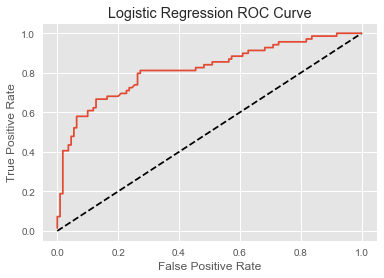

In [38]:
# Plotting the ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [39]:
# Fitting k-Nearest Neighbors to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [40]:
# Predicting the Test set results
y_pred2 = knn.predict(X_test)

In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, log_loss
cm2 = confusion_matrix(y_test, y_pred2)
cr2 = classification_report(y_test, y_pred2)
print(cm2)
print(cr2)

[[91 19]
 [35 34]]
             precision    recall  f1-score   support

          0       0.72      0.83      0.77       110
          1       0.64      0.49      0.56        69

avg / total       0.69      0.70      0.69       179



In [42]:
knn.score(X_test, y_test)

0.6983240223463687

In [43]:
log_loss(y_test, y_pred)

7.91119678740269

In [44]:
log_loss(y_test, y_pred2)

10.419604009365088

In [45]:
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=34, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
y_predict = logreg.predict(Xtest)

In [47]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_predict
    })
submission.to_csv('my_solution_4.csv', index=False)

In [48]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))